In [134]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding
from torch.utils.data import DataLoader

BASE_MODEL = "bert-base-cased"
LEARNING_RATE = 2e-5
MAX_LENGTH = 256
BATCH_SIZE = 16
EPOCHS = 20

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
model = AutoModelForSequenceClassification.from_pretrained(BASE_MODEL)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import seaborn as sns

list

In [73]:
from transformers import pipeline
import pandas as pd

# Load your data from a CSV file
summaries_df = pd.read_csv('../data/v2/train/train_data.csv')
texts = summaries_df.text.tolist()

# Initialize the pipeline for text classification
pipe = pipeline("text-classification", model="marieke93/MiniLM-evidence-types", top_k=7)

# Create a list of dictionaries where each dictionary corresponds to a row
rows = []

# Process each text and handle texts that are longer than the model's maximum sequence length
for text in texts:
    if len(text) <= 512:  # Check if the text is within the model's maximum sequence length
        out = pipe(text)
    else:
        # If the text is too long, truncate it or split it into smaller segments
        # You can implement custom logic here based on your specific use case
        # For example, you can split the text into paragraphs or sentences

        # For now, we'll truncate the text
        out = pipe(text[:512])

    # Process the results
    for item in out:
        row_dict = {label['label']: label['score'] for label in item}
        rows.append(row_dict)

# Convert the list of dictionaries into a Pandas DataFrame
labelDf = pd.DataFrame(rows)
labelDf


,Anecdote,Testimony,Statistics/Study,Assumption,Other,None,Definition
0,0.980403,0.006350,0.005669,0.003674,0.001996,0.001103,0.000806
1,0.751924,0.076913,0.143103,0.001183,0.014399,0.001601,0.010877
2,0.759786,0.005941,0.003227,0.223051,0.002820,0.001846,0.003329
3,0.004405,0.000792,0.000270,0.988372,0.001003,0.001736,0.003422
4,0.420172,0.004702,0.002192,0.563104,0.002941,0.002977,0.003911
...,...,...,...,...,...,...,...
5727,0.000928,0.002065,0.001800,0.006841,0.012768,0.973924,0.001675
5728,0.965595,0.012538,0.014436,0.001723,0.003228,0.001161,0.001319
5729,0.980341,0.004744,0.003667,0.007527,0.001737,0.001254,0.000731
5730,0.001290,0.001640,0.001243,0.014078,0.010358,0.970007,0.001383


In [74]:
labelDf['text'] = texts
labelDf

,Anecdote,Testimony,Statistics/Study,Assumption,Other,None,Definition,text
0,0.980403,0.006350,0.005669,0.003674,0.001996,0.001103,0.000806,In the social pyramid of ancient Egypt the pha...
1,0.751924,0.076913,0.143103,0.001183,0.014399,0.001601,0.010877,Aristotle claims that an ideal tragedy should ...
2,0.759786,0.005941,0.003227,0.223051,0.002820,0.001846,0.003329,The ancient Egyptian system of government was ...
3,0.004405,0.000792,0.000270,0.988372,0.001003,0.001736,0.003422,They put pickle in them to mask the smell of r...
4,0.420172,0.004702,0.002192,0.563104,0.002941,0.002977,0.003911,"""whenever meat was so spoiled that it could no..."
...,...,...,...,...,...,...,...,...
5727,0.000928,0.002065,0.001800,0.006841,0.012768,0.973924,0.001675,The ideal tragedy should be complex in plot. T...
5728,0.965595,0.012538,0.014436,0.001723,0.003228,0.001161,0.001319,"In paragraph 2 the text states that ""Jonas had..."
5729,0.980341,0.004744,0.003667,0.007527,0.001737,0.001254,0.000731,The third wave developed quickly because stude...
5730,0.001290,0.001640,0.001243,0.014078,0.010358,0.970007,0.001383,An ideal tragedy should be complex and should ...


In [77]:
labelDf.to_csv('./data/feature_engineered/labeled.csv', index=None)

In [82]:
summaries_df.head()

,student_id,prompt_id,text,content,wording
0,8a31b8cc1996,3b9047,In the social pyramid of ancient Egypt the pha...,-0.077267,0.424365
1,8c9411cfc953,39c16e,Aristotle claims that an ideal tragedy should ...,0.559070,-0.634924
2,4387107feb4d,3b9047,The ancient Egyptian system of government was ...,1.376083,2.389443
3,d720eb53c270,ebad26,They put pickle in them to mask the smell of r...,0.297031,-0.168734
4,e887883b946c,ebad26,"""whenever meat was so spoiled that it could no...",-0.093814,0.503833


In [81]:
experiment_df = pd.read_csv('./data/feature_engineered/labeled.csv')
experiment_df.head()

,Anecdote,Testimony,Statistics/Study,Assumption,Other,None,Definition,text
0,0.980403,0.006350,0.005669,0.003674,0.001996,0.001103,0.000806,In the social pyramid of ancient Egypt the pha...
1,0.751924,0.076913,0.143103,0.001183,0.014399,0.001601,0.010877,Aristotle claims that an ideal tragedy should ...
2,0.759786,0.005941,0.003227,0.223051,0.002820,0.001846,0.003329,The ancient Egyptian system of government was ...
3,0.004405,0.000792,0.000270,0.988372,0.001003,0.001736,0.003422,They put pickle in them to mask the smell of r...
4,0.420172,0.004702,0.002192,0.563104,0.002941,0.002977,0.003911,"""whenever meat was so spoiled that it could no..."


In [83]:
experiment_df['wording'] = summaries_df['wording']
experiment_df

,Anecdote,Testimony,Statistics/Study,Assumption,Other,None,Definition,text,wording
0,0.980403,0.006350,0.005669,0.003674,0.001996,0.001103,0.000806,In the social pyramid of ancient Egypt the pha...,0.424365
1,0.751924,0.076913,0.143103,0.001183,0.014399,0.001601,0.010877,Aristotle claims that an ideal tragedy should ...,-0.634924
2,0.759786,0.005941,0.003227,0.223051,0.002820,0.001846,0.003329,The ancient Egyptian system of government was ...,2.389443
3,0.004405,0.000792,0.000270,0.988372,0.001003,0.001736,0.003422,They put pickle in them to mask the smell of r...,-0.168734
4,0.420172,0.004702,0.002192,0.563104,0.002941,0.002977,0.003911,"""whenever meat was so spoiled that it could no...",0.503833
...,...,...,...,...,...,...,...,...,...
5727,0.000928,0.002065,0.001800,0.006841,0.012768,0.973924,0.001675,The ideal tragedy should be complex in plot. T...,-0.751414
5728,0.965595,0.012538,0.014436,0.001723,0.003228,0.001161,0.001319,"In paragraph 2 the text states that ""Jonas had...",-0.634924
5729,0.980341,0.004744,0.003667,0.007527,0.001737,0.001254,0.000731,The third wave developed quickly because stude...,0.835238
5730,0.001290,0.001640,0.001243,0.014078,0.010358,0.970007,0.001383,An ideal tragedy should be complex and should ...,0.875453


In [84]:
experiment_df['content'] = summaries_df['content']
experiment_df

,Anecdote,Testimony,Statistics/Study,Assumption,Other,None,Definition,text,wording,content
0,0.980403,0.006350,0.005669,0.003674,0.001996,0.001103,0.000806,In the social pyramid of ancient Egypt the pha...,0.424365,-0.077267
1,0.751924,0.076913,0.143103,0.001183,0.014399,0.001601,0.010877,Aristotle claims that an ideal tragedy should ...,-0.634924,0.559070
2,0.759786,0.005941,0.003227,0.223051,0.002820,0.001846,0.003329,The ancient Egyptian system of government was ...,2.389443,1.376083
3,0.004405,0.000792,0.000270,0.988372,0.001003,0.001736,0.003422,They put pickle in them to mask the smell of r...,-0.168734,0.297031
4,0.420172,0.004702,0.002192,0.563104,0.002941,0.002977,0.003911,"""whenever meat was so spoiled that it could no...",0.503833,-0.093814
...,...,...,...,...,...,...,...,...,...,...
5727,0.000928,0.002065,0.001800,0.006841,0.012768,0.973924,0.001675,The ideal tragedy should be complex in plot. T...,-0.751414,-0.974242
5728,0.965595,0.012538,0.014436,0.001723,0.003228,0.001161,0.001319,"In paragraph 2 the text states that ""Jonas had...",-0.634924,0.559070
5729,0.980341,0.004744,0.003667,0.007527,0.001737,0.001254,0.000731,The third wave developed quickly because stude...,0.835238,1.344145
5730,0.001290,0.001640,0.001243,0.014078,0.010358,0.970007,0.001383,An ideal tragedy should be complex and should ...,0.875453,0.873957


In [85]:
experiment_df.to_csv('./data/feature_engineered/labeled.csv', index=None)

In [86]:
pd.read_csv('./data/feature_engineered/labeled.csv')

,Anecdote,Testimony,Statistics/Study,Assumption,Other,None,Definition,text,wording,content
0,0.980403,0.006350,0.005669,0.003674,0.001996,0.001103,0.000806,In the social pyramid of ancient Egypt the pha...,0.424365,-0.077267
1,0.751924,0.076913,0.143103,0.001183,0.014399,0.001601,0.010877,Aristotle claims that an ideal tragedy should ...,-0.634924,0.559070
2,0.759786,0.005941,0.003227,0.223051,0.002820,0.001846,0.003329,The ancient Egyptian system of government was ...,2.389443,1.376083
3,0.004405,0.000792,0.000270,0.988372,0.001003,0.001736,0.003422,They put pickle in them to mask the smell of r...,-0.168734,0.297031
4,0.420172,0.004702,0.002192,0.563104,0.002941,0.002977,0.003911,"""whenever meat was so spoiled that it could no...",0.503833,-0.093814
...,...,...,...,...,...,...,...,...,...,...
5727,0.000928,0.002065,0.001800,0.006841,0.012768,0.973924,0.001675,The ideal tragedy should be complex in plot. T...,-0.751414,-0.974242
5728,0.965595,0.012538,0.014436,0.001723,0.003228,0.001161,0.001319,"In paragraph 2 the text states that ""Jonas had...",-0.634924,0.559070
5729,0.980341,0.004744,0.003667,0.007527,0.001737,0.001254,0.000731,The third wave developed quickly because stude...,0.835238,1.344145
5730,0.001290,0.001640,0.001243,0.014078,0.010358,0.970007,0.001383,An ideal tragedy should be complex and should ...,0.875453,0.873957


<Axes: >

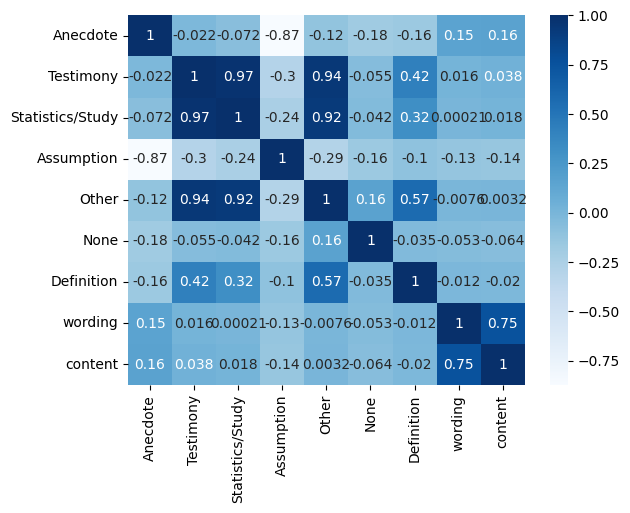

In [89]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix on the numeric columns
corr = experiment_df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True)

In [93]:
from transformers import pipeline

classify = pipeline(
    task="text-classification",
    model="cffl/bert-base-styleclassification-subjective-neutral",
    top_k=2,)


# Create a list of dictionaries where each dictionary corresponds to a row
rows = []

# Process each text and handle texts that are longer than the model's maximum sequence length
for text in texts:
    if len(text) <= 512:  # Check if the text is within the model's maximum sequence length
        out = classify(text)
    else:
        # If the text is too long, truncate it or split it into smaller segments
        # You can implement custom logic here based on your specific use case
        # For example, you can split the text into paragraphs or sentences

        # For now, we'll truncate the text
        out = classify(text[:512])

    # Process the results
    for item in out:
        row_dict = {label['label']: label['score'] for label in item}
        rows.append(row_dict)

# Convert the list of dictionaries into a Pandas DataFrame
neutral_df = pd.DataFrame(rows)
neutral_df


,NEUTRAL,SUBJECTIVE
0,0.688828,0.311172
1,0.716388,0.283612
2,0.739428,0.260572
3,0.621325,0.378675
4,0.028194,0.971806
...,...,...
5727,0.414317,0.585683
5728,0.470017,0.529983
5729,0.106503,0.893497
5730,0.493677,0.506323


In [94]:
neutral_df['text'] = texts
neutral_df['wording'] = summaries_df['wording']
neutral_df['content'] = summaries_df['content']
neutral_df

,NEUTRAL,SUBJECTIVE,text,wording,content
0,0.688828,0.311172,In the social pyramid of ancient Egypt the pha...,0.424365,-0.077267
1,0.716388,0.283612,Aristotle claims that an ideal tragedy should ...,-0.634924,0.559070
2,0.739428,0.260572,The ancient Egyptian system of government was ...,2.389443,1.376083
3,0.621325,0.378675,They put pickle in them to mask the smell of r...,-0.168734,0.297031
4,0.028194,0.971806,"""whenever meat was so spoiled that it could no...",0.503833,-0.093814
...,...,...,...,...,...
5727,0.414317,0.585683,The ideal tragedy should be complex in plot. T...,-0.751414,-0.974242
5728,0.470017,0.529983,"In paragraph 2 the text states that ""Jonas had...",-0.634924,0.559070
5729,0.106503,0.893497,The third wave developed quickly because stude...,0.835238,1.344145
5730,0.493677,0.506323,An ideal tragedy should be complex and should ...,0.875453,0.873957


In [97]:
neutral_df.to_csv('./data/feature_engineered/neutral.csv', index=None)


<Axes: >

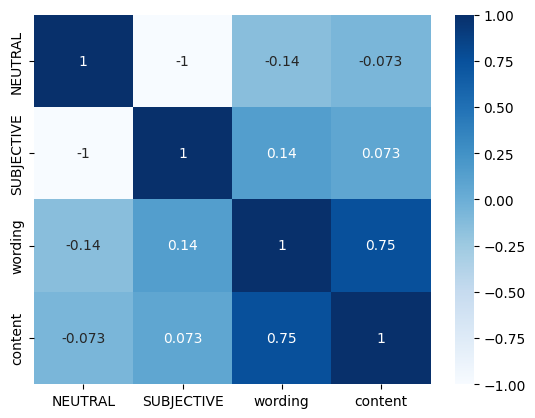

In [99]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix on the numeric columns
corr = neutral_df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True)

In [116]:
import torch
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("Ashishkr/query_wellformedness_score")
model = AutoModelForSequenceClassification.from_pretrained("Ashishkr/query_wellformedness_score")

# Create a list of dictionaries where each dictionary corresponds to a row
rows = []

# Process each text and handle texts that are longer than the model's maximum sequence length
for text in texts:
    sentences = sent_tokenize(text)
    features = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
    model.eval()
    with torch.no_grad():
        scores = model(**features).logits

    rows.append({'wellformed_score': scores.mean()})

# Convert the list of dictionaries into a Pandas DataFrame
wellformed_df = pd.DataFrame(rows)
wellformed_df

Some weights of the model checkpoint at Ashishkr/query_wellformedness_score were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,wellformed_score
0,tensor(0.1150)
1,tensor(0.7569)
2,tensor(0.6793)
3,tensor(0.3751)
4,tensor(0.5322)
...,...
5727,tensor(0.6602)
5728,tensor(0.4457)
5729,tensor(0.5030)
5730,tensor(0.4688)


In [117]:

wellformed_df['text'] = texts
wellformed_df


,wellformed_score,text
0,tensor(0.1150),In the social pyramid of ancient Egypt the pha...
1,tensor(0.7569),Aristotle claims that an ideal tragedy should ...
2,tensor(0.6793),The ancient Egyptian system of government was ...
3,tensor(0.3751),They put pickle in them to mask the smell of r...
4,tensor(0.5322),"""whenever meat was so spoiled that it could no..."
...,...,...
5727,tensor(0.6602),The ideal tragedy should be complex in plot. T...
5728,tensor(0.4457),"In paragraph 2 the text states that ""Jonas had..."
5729,tensor(0.5030),The third wave developed quickly because stude...
5730,tensor(0.4688),An ideal tragedy should be complex and should ...


In [127]:
wellformed_df['wellformed_score_float'] = wellformed_df['wellformed_score'].astype(float)
wellformed_df['wording_score'] = summaries_df['wording']
wellformed_df['content_score'] = summaries_df['content']
wellformed_df

,wellformed_score,text,wellformed_score_float,wording_score,content_score
0,tensor(0.1150),In the social pyramid of ancient Egypt the pha...,0.114950,0.424365,-0.077267
1,tensor(0.7569),Aristotle claims that an ideal tragedy should ...,0.756887,-0.634924,0.559070
2,tensor(0.6793),The ancient Egyptian system of government was ...,0.679334,2.389443,1.376083
3,tensor(0.3751),They put pickle in them to mask the smell of r...,0.375104,-0.168734,0.297031
4,tensor(0.5322),"""whenever meat was so spoiled that it could no...",0.532158,0.503833,-0.093814
...,...,...,...,...,...
5727,tensor(0.6602),The ideal tragedy should be complex in plot. T...,0.660151,-0.751414,-0.974242
5728,tensor(0.4457),"In paragraph 2 the text states that ""Jonas had...",0.445657,-0.634924,0.559070
5729,tensor(0.5030),The third wave developed quickly because stude...,0.503045,0.835238,1.344145
5730,tensor(0.4688),An ideal tragedy should be complex and should ...,0.468792,0.875453,0.873957


<Axes: >

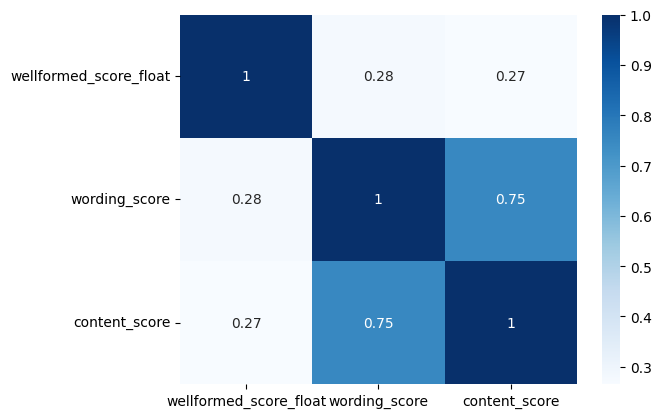

In [128]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix on the numeric columns
corr = wellformed_df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True)

In [132]:
wellformed_df.to_csv('./data/feature_engineered/wellformed.csv', index=None)


In [142]:
dfwithwellformed = pd.read_csv('./data/feature_engineered/wellformed.csv')


In [146]:
dfwithwellformed

,wellformed_score,text,wellformed_score_float,wording_score,content_score
0,tensor(0.1150),In the social pyramid of ancient Egypt the pha...,0.114950,0.424365,-0.077267
1,tensor(0.7569),Aristotle claims that an ideal tragedy should ...,0.756887,-0.634924,0.559070
2,tensor(0.6793),The ancient Egyptian system of government was ...,0.679334,2.389443,1.376083
3,tensor(0.3751),They put pickle in them to mask the smell of r...,0.375104,-0.168734,0.297031
4,tensor(0.5322),"""whenever meat was so spoiled that it could no...",0.532158,0.503833,-0.093814
...,...,...,...,...,...
5727,tensor(0.6602),The ideal tragedy should be complex in plot. T...,0.660151,-0.751414,-0.974242
5728,tensor(0.4457),"In paragraph 2 the text states that ""Jonas had...",0.445657,-0.634924,0.559070
5729,tensor(0.5030),The third wave developed quickly because stude...,0.503045,0.835238,1.344145
5730,tensor(0.4688),An ideal tragedy should be complex and should ...,0.468792,0.875453,0.873957


In [144]:
dfwithwellformed.text[0]

0       In the social pyramid of ancient Egypt the pha...
1       Aristotle claims that an ideal tragedy should ...
2       The ancient Egyptian system of government was ...
3       They put pickle in them to mask the smell of r...
4       "whenever meat was so spoiled that it could no...
                              ...                        
5727    The ideal tragedy should be complex in plot. T...
5728    In paragraph 2 the text states that "Jonas had...
5729    The third wave developed quickly because stude...
5730    An ideal tragedy should be complex and should ...
5731        One of the first notions of tragedy Aristo...
Name: text, Length: 5732, dtype: object

In [135]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_path = "./models/bert-base-cased/checkpoint-5020"  # Replace with the path to your saved model
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

In [155]:
from tqdm import tqdm

y_preds = []

for text in tqdm(dfwithwellformed.text):
    encoded = tokenizer(text, truncation=True, padding="max_length", max_length=256, return_tensors="pt")
    y_preds += model(**encoded).logits.reshape(-1).tolist()

dfwithwellformed['predicted_wording_score'] = y_preds

100%|██████████| 5732/5732 [21:13<00:00,  4.50it/s]


In [159]:
dfwithwellformed.to_csv('./data/feature_engineered/wellformed_with_predicted_wording_score.csv', index=None)


In [160]:
dfwithwellformed

,wellformed_score,text,wellformed_score_float,wording_score,content_score,predicted_wording_score
0,tensor(0.1150),In the social pyramid of ancient Egypt the pha...,0.114950,0.424365,-0.077267,0.613352
1,tensor(0.7569),Aristotle claims that an ideal tragedy should ...,0.756887,-0.634924,0.559070,-0.626006
2,tensor(0.6793),The ancient Egyptian system of government was ...,0.679334,2.389443,1.376083,2.679974
3,tensor(0.3751),They put pickle in them to mask the smell of r...,0.375104,-0.168734,0.297031,0.009229
4,tensor(0.5322),"""whenever meat was so spoiled that it could no...",0.532158,0.503833,-0.093814,0.722013
...,...,...,...,...,...,...
5727,tensor(0.6602),The ideal tragedy should be complex in plot. T...,0.660151,-0.751414,-0.974242,-0.307471
5728,tensor(0.4457),"In paragraph 2 the text states that ""Jonas had...",0.445657,-0.634924,0.559070,-0.625640
5729,tensor(0.5030),The third wave developed quickly because stude...,0.503045,0.835238,1.344145,0.831004
5730,tensor(0.4688),An ideal tragedy should be complex and should ...,0.468792,0.875453,0.873957,0.878229


,wording_score
0,0.424365
1,-0.634924
2,2.389443
3,-0.168734
4,0.503833
...,...
5727,-0.751414
5728,-0.634924
5729,0.835238
5730,0.875453


In [203]:
x_test = dfwithwellformed[['wellformed_score_float', 'predicted_wording_score']][:1000].values
y_test = dfwithwellformed[['wording_score']][:1000].values

In [204]:
x_train = dfwithwellformed[['wellformed_score_float', 'predicted_wording_score']][1000:].values
y_train = dfwithwellformed[['wording_score']][1000:].values

In [251]:
import torch
import torch.nn as nn
from sklearn.metrics import r2_score
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter


# Define your neural network class
class CombinedNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, input_data):
        transformer_score, well_formed_value = input_data[:, 0], input_data[:, 1]
        
        # Pass the two input components through the network
        x = self.fc1(torch.cat((transformer_score.unsqueeze(1), well_formed_value.unsqueeze(1)), dim=1))
        x = self.relu(x)
        output = self.fc2(x)
        return output

# Define the input dimensions, hidden size, and output size
input_size = 2  # Assuming you have 2 input features (transformer score and well-formed value)
hidden_size = 256  # You can adjust this based on your problem
output_size = 1  # Wording score is a single value
num_epochs = 20
# Create an instance of the model
model = CombinedNetwork(input_size, hidden_size, output_size)
writer = SummaryWriter()
# Define your loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (you'll need to load your data and preprocess it)
running_loss = 0.0
for epoch in range(num_epochs):
    # Load your training data (transformer scores and well-formed values)
    inputs = torch.tensor(x_train, dtype=torch.float32)
    targets = torch.tensor(y_train, dtype=torch.float32)
    
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)

    # Compute the loss
    loss = criterion(outputs, targets)
    running_loss += loss.item()

    # Backpropagation and optimization
    loss.backward()
    optimizer.step()
    writer.add_scalar('Loss', running_loss, epoch)

writer.flush()
writer.close()

print('Finished Training')

Finished Training


In [242]:
from sklearn.metrics import r2_score

model.eval()
with torch.no_grad():
    test_inputs = torch.tensor(x_test, dtype=torch.float32)
    predictions = model(test_inputs)

r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

R2 Score: 0.8781099257260011


In [176]:
dfwithwellformed

,wellformed_score,text,wellformed_score_float,wording_score,content_score,predicted_wording_score
0,tensor(0.1150),In the social pyramid of ancient Egypt the pha...,0.114950,0.424365,-0.077267,0.613352
1,tensor(0.7569),Aristotle claims that an ideal tragedy should ...,0.756887,-0.634924,0.559070,-0.626006
2,tensor(0.6793),The ancient Egyptian system of government was ...,0.679334,2.389443,1.376083,2.679974
3,tensor(0.3751),They put pickle in them to mask the smell of r...,0.375104,-0.168734,0.297031,0.009229
4,tensor(0.5322),"""whenever meat was so spoiled that it could no...",0.532158,0.503833,-0.093814,0.722013
...,...,...,...,...,...,...
5727,tensor(0.6602),The ideal tragedy should be complex in plot. T...,0.660151,-0.751414,-0.974242,-0.307471
5728,tensor(0.4457),"In paragraph 2 the text states that ""Jonas had...",0.445657,-0.634924,0.559070,-0.625640
5729,tensor(0.5030),The third wave developed quickly because stude...,0.503045,0.835238,1.344145,0.831004
5730,tensor(0.4688),An ideal tragedy should be complex and should ...,0.468792,0.875453,0.873957,0.878229
